In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import pandas as pd
import scanpy as sc
from os.path import join
import numpy as np
import anndata
import pickle
import os
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from lib.plot_utils import *
import utils

In [60]:
# Fix export PDF as text issue
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [61]:
means = utils.get_means()

True /storage/groups/ml01/workspace/mo/for_nacho/Norman2019_prep_new.h5ad
True /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/fig4_predicted_adata_full.h5ad


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


True /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/figure4_latent_adata.h5ad

dimensions of embedding: (497800, 64)
all good. Removing datasets based on repetition is then tractable


In [62]:
means.shape

(5262, 5000)

In [63]:
!ls -ltrh ../data/bkp_path.tsv.gz

ls: cannot access '../data/bkp_path.tsv.gz': No such file or directory


In [64]:
pwd

'/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/cpa-reproducibility/notebooks/figure4'

In [65]:
!ls -ltrh ../../../../data/bkp_path.tsv.gz

ls: cannot access '../../../../data/bkp_path.tsv.gz': No such file or directory


In [121]:
bkp_path = '../../data/fitting_coefs_rf_path.tsv.gz'
res = pd.read_csv(bkp_path, compression='gzip', index_col=0).reset_index(drop=True)
res['type'] = (res['a'] + '+' + res['b']).map(means.obs['type'].to_dict())
res['type'] = np.where(pd.isnull(res['type']), (res['b'] + '+' + res['a']).map(means.obs['type'].to_dict()), res['type'])
res['dominance'] = np.where(np.isnan(res['dominance']), np.abs(np.log10(res['c1'].abs() / res['c2'].abs())), res['dominance'])
res['type'].value_counts()
# res[['c1', 'c2', 'lin_model_fit', 'dominance', 'magnitude', 'single_double_sim', 'single_sim', 'eq_contrib']]

predicted    4949
measured      105
Name: type, dtype: int64

In [122]:
import matplotlib.pyplot as plt

In [123]:
%matplotlib inline

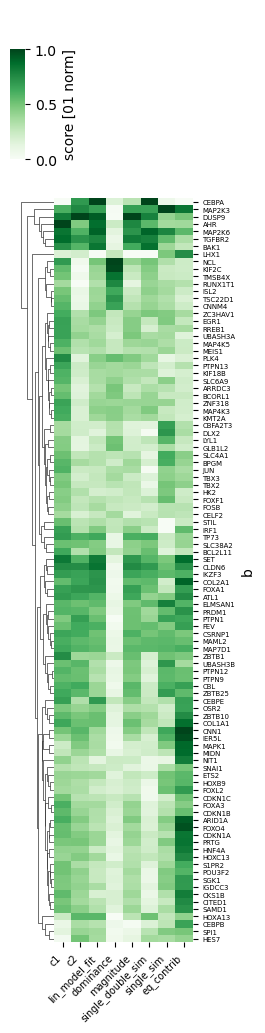

In [69]:
gene = 'KLF1'

sel = res[res['a'].str.contains(gene) | res['b'].str.contains('KLF1')][['c1', 'c2', 'lin_model_fit', 'dominance', 'magnitude', 'single_double_sim', 'single_sim', 'eq_contrib', 'a', 'b']]
sel['ctmp']  = np.where(sel['a'] != gene, sel['c2'], sel['c1'])
sel['c2']  = np.where(sel['a'] != gene, sel['c1'], sel['c2'])
sel['c1']  = np.where(sel['a'] != gene, sel['ctmp'], sel['c1'])

sel['c']  = np.where(sel['a'] != gene, sel['b'], sel['a'])
sel['b']  = np.where(sel['a'] != gene, sel['a'], sel['b'])
sel['a']  = np.where(sel['a'] != gene, sel['c'], sel['a'])

sel.index = sel['b']

del sel['a']
del sel['b']
del sel['ctmp']
del sel['c']
rcParams['figure.dpi'] = 100
for c in sel:
    sel[c] = (sel[c] - np.min(sel[c])) / (np.max(sel[c]) - np.min(sel[c]))
cg = sns.clustermap(sel, yticklabels=True, cmap='Greens', col_cluster=False, figsize=[3, 11], cbar_kws={'label': 'score [01 norm]'},
                   cbar_pos=(0.02, 0.85, 0.05, 0.10),)
cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize = 5);
cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 7, rotation = 45, ha = 'right');
plt.savefig('../../data/figures/KLF1_all.pdf')
plt.show()
# plt.close()

### Smaller format for figure plotting

In [80]:
res['type'].value_counts()

predicted    93
measured      7
Name: type, dtype: int64

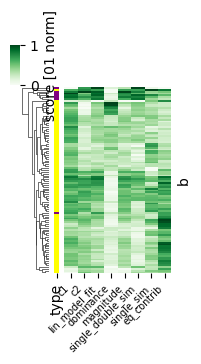

In [81]:
gene = 'KLF1'

sel = res[res['a'].str.contains(gene) | res['b'].str.contains('KLF1')][['c1', 'c2', 'lin_model_fit', 'dominance', 'magnitude', 'single_double_sim', 'single_sim', 'eq_contrib', 'a', 'b', 'type']]
sel['ctmp']  = np.where(sel['a'] != gene, sel['c2'], sel['c1'])
sel['c2']  = np.where(sel['a'] != gene, sel['c1'], sel['c2'])
sel['c1']  = np.where(sel['a'] != gene, sel['ctmp'], sel['c1'])

sel['c']  = np.where(sel['a'] != gene, sel['b'], sel['a'])
sel['b']  = np.where(sel['a'] != gene, sel['a'], sel['b'])
sel['a']  = np.where(sel['a'] != gene, sel['c'], sel['a'])

sel.index = sel['b']

data_type = sel[['type']]
data_type['type'] = np.where(data_type['type'] == 'predicted', 'yellow', 'purple')

del sel['type']

del sel['a']
del sel['b']
del sel['ctmp']
del sel['c']
rcParams['figure.dpi'] = 100
for c in sel:
    sel[c] = (sel[c] - np.min(sel[c])) / (np.max(sel[c]) - np.min(sel[c]))
cg = sns.clustermap(sel, yticklabels=False, xticklabels=True, row_colors=data_type,
                    cmap='Greens', col_cluster=False, figsize=[2, 4], cbar_kws={'label': 'score [01 norm]'},
                   cbar_pos=(0.02, 0.85, 0.05, 0.10),)
cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize = 6);
cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 7, rotation = 45, ha = 'right');

plt.savefig('../../data/figures/KLF1_small.pdf')

plt.show()

In [71]:
import warnings
warnings.filterwarnings("ignore")


In [72]:
from lib.plot_utils import *

In [73]:
import mygene
mg = mygene.MyGeneInfo()

KLF1 CEBPA
['measured' 'measured' 'measured']


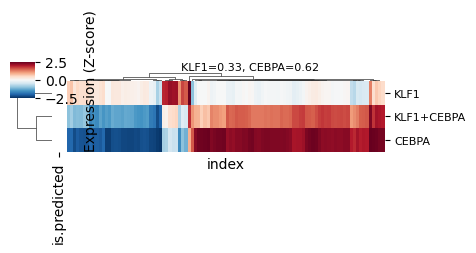

KLF1 NCL
['predicted' 'measured' 'measured']


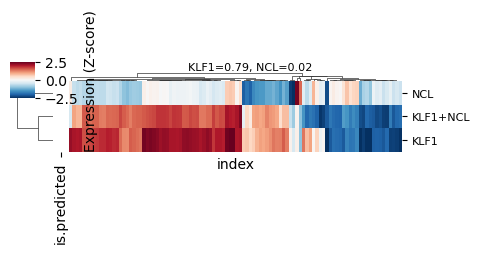

KLF1 PTPN13
['predicted' 'measured' 'measured']


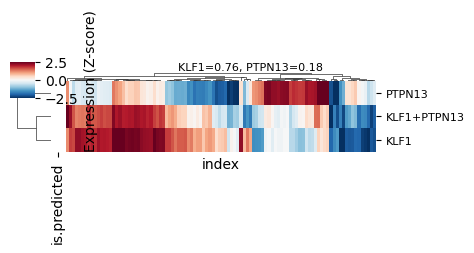

KLF1 FOXA3
['predicted' 'measured' 'measured']


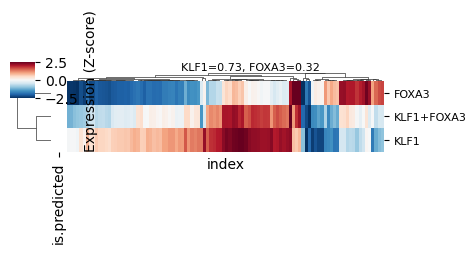

KLF1 HES7
['predicted' 'measured' 'measured']


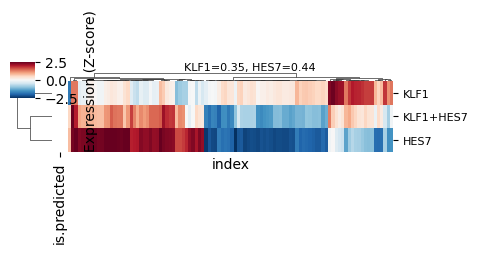

KLF1 UBASH3A
['predicted' 'measured' 'measured']


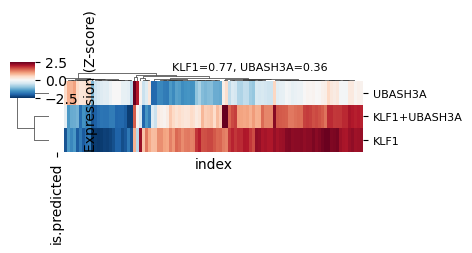

KLF1 CBL
['predicted' 'measured' 'measured']


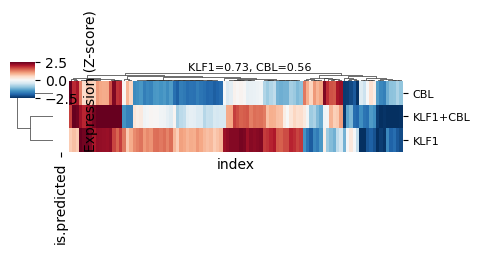

KLF1 AHR
['measured' 'measured' 'measured']


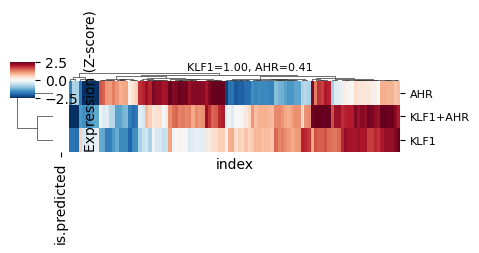

KLF1 BAK1
['measured' 'measured' 'measured']


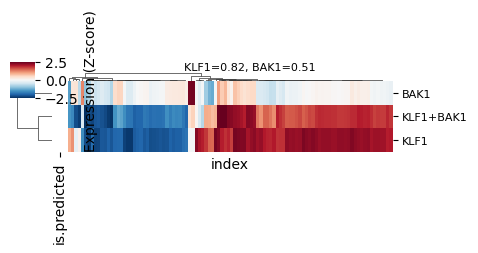

In [74]:
for a, b in [['KLF1', 'CEBPA'], # epistasis
             ['KLF1', 'NCL'],
             ['KLF1', 'PTPN13'], # # one-dominant
             ['KLF1', 'FOXA3'],  # synergy
             ['KLF1', 'HES7'],
             ['KLF1', 'UBASH3A'], # epistasis
             ['KLF1', 'CBL'],
             ['KLF1', 'AHR'],
             ['KLF1', 'BAK1']]:  
    # rcParams['figure.dpi'] = 80
    print(a, b)
    utils.plot_heatmap(a, b, means, res=res, figsize=[5, 2])
    plt.savefig('../../data/figures/%s_%s.pdf' % (a, b))
    plt.show()

In [75]:
!readlink -f ../data/figures/KLF1_UBASH3A.pdf

### Globally classify annotations

In [124]:

# defining epistatic
res['c.relevant'] = (res['c1'] > 0.2) & (res['c2'] > 0.2)
res['likely.epistatic'] = (res['c1'].abs() > (res['c2'].abs() * 2)) | (res['c1'].abs() > (res['c2'].abs() * 2))
res['epistatic'] = res['c.relevant'] & res['likely.epistatic']

# potentiation
res['strong.synergy.diff.phen'] = (res['magnitude'] > 1) & ((res['single_sim'] - 1).abs() > .2)
res['potentiation'] = (res['magnitude'] > 1) & ((res['single_sim'] - 1).abs() > .5)
res['strong.synergy.sim.phen'] = (res['magnitude'] > 1) & ((res['single_double_sim'] - 1).abs() < .2)
res['approx.additive'] = (res['magnitude'] - 1).abs() < .1
res['redundant'] = ((res['single_double_sim'] - 1).abs() < .2) & ((res['single_sim'] - 1).abs() > .2)

In [125]:
res['epistatic'].value_counts()


False    4693
True      361
Name: epistatic, dtype: int64

In [126]:
events = []
for g in set(res[['a', 'b']].values.flatten()):
    grp = res[(res['a'] == g) | (res['b'] == g)]
    n_epistatic = np.sum(grp['epistatic'])
    n_potentiation = np.sum(grp['potentiation'])
    n_approx_additive = np.sum(grp['approx.additive'])
    n_approx_ = np.sum(grp['approx.additive'])
    
    grp[['epistatic', 'approx.additive', 'redundant', 'strong.synergy.sim.phen', 'strong.synergy.diff.phen', 'potentiation']]
    
    ndf = pd.DataFrame(grp[['epistatic', 'approx.additive', 'redundant', 'strong.synergy.sim.phen', 'strong.synergy.diff.phen', 'potentiation']].sum()).T
    
    ndf.index = [g]
    events.append(ndf)
    # print(g, n_epistatic)

In [127]:
events = pd.concat(events)

In [128]:
events['sum'] = events.sum(axis=1)
events = events.sort_values('sum')
sel_events = events[events['sum'] > 50]
del events['sum']
del sel_events['sum']
# sel_events = events.tail(50)

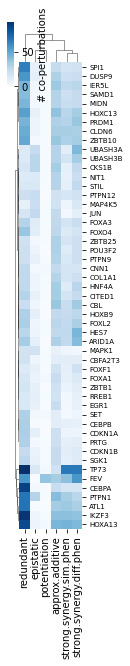

In [130]:
cg = sns.clustermap(sel_events, cmap='Blues', yticklabels=True, figsize=[2, 9], cbar_kws={'label': '# co-perturbations'},
                   dendrogram_ratio=.06, cbar_pos=(0.02, 0.9, 0.05, 0.10))
cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize =7);# rotation = 45, ha = 'right');
cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), rotation=90, ha='center');# rotation = 45, ha = 'right');
plt.savefig('../../data/figures/co-perturbations_interaction_types.pdf')
# plt.close()
plt.show()

In [99]:
res.groupby(['type', 'redundant']).size()

type       redundant
measured   False         2
           True          5
predicted  False        91
           True          2
dtype: int64

In [100]:
res.groupby(['type', 'approx.additive']).size()

type       approx.additive
measured   False               4
           True                3
predicted  False              82
           True               11
dtype: int64

In [101]:
res.groupby(['type', 'potentiation']).size()

type       potentiation
measured   False            5
           True             2
predicted  False           90
           True             3
dtype: int64

In [102]:
res.groupby(['type', 'epistatic']).size()

type       epistatic
measured   False         5
           True          2
predicted  False        84
           True          9
dtype: int64

In [116]:
import gzip


In [120]:
from os import listdir
## Attempt to summarize interaction types for top N genes, according to behaviors
d = '../../data/rf_genes'
top_genes_by_double_pert = {}
pkl_filenames = [f for f in listdir(d)]
for i, f in enumerate(pkl_filenames):
    if i % 500 == 0:
        print(i, f, len(pkl_filenames))
    p = join(d, f)
    # pred = pickle.load(open(p, 'rb'))
    pred = pd.Series(list(pd.read_csv(join(d, f), index_col=0)['index']))
    top_genes_by_double_pert[f] = pred.head(500)

0 ELMSAN1_HK2.tsv.gz 5565
500 RUNX1T1_PLK4.tsv.gz 5565
1000 SLC6A9_CBL.tsv.gz 5565
1500 GLB1L2_LHX1.tsv.gz 5565
2000 ZBTB1_CSRNP1.tsv.gz 5565
2500 COL2A1_PLK4.tsv.gz 5565
3000 MIDN_SET.tsv.gz 5565
3500 NCL_STIL.tsv.gz 5565
4000 MAP4K5_KIF2C.tsv.gz 5565
4500 SLC6A9_HOXB9.tsv.gz 5565
5000 FOXO4_C3orf72.tsv.gz 5565
5500 HK2_MAP2K6.tsv.gz 5565


In [131]:
len(top_genes_by_double_pert)

5565

condition
AHR+FEV           0
AHR+KLF1          0
AHR+ctrl          0
ARID1A+ctrl       1
ARRDC3+ctrl       0
                 ..
ZBTB10+ZC3HAV1    0
ZBTB10+ZNF318     0
ZBTB25+ZC3HAV1    0
ZBTB25+ZNF318     0
ZC3HAV1+ZNF318    0
Name: is.ARID1A, Length: 5262, dtype: int64

In [177]:
df = []
for k in top_genes_by_double_pert:
    if 'ctrl' in k:
        continue
    a, b = k.replace('.tsv.gz', '').split('_')
    rf_genes = top_genes_by_double_pert[k]
    rf_genes = pd.Series(rf_genes, index=rf_genes)
    z = utils.get_zscores_features(a, b, means, rf_genes, n_genes=200)
    z = z.T[[c for c in z.T if 'ctrl' in c] + [c for c in z.T if 'ctrl' not in c]]
    z.columns = ['a', 'b', 'ab']
    z['perturbation.name'] = a + '+' + b
    df.append(z)
    if len(df) % 100 == 0:
        print(len(df), k, a, b)


100 ARID1A_TSC22D1.tsv.gz ARID1A TSC22D1
200 SLC6A9_TMSB4X.tsv.gz SLC6A9 TMSB4X
300 TBX2_KLF1.tsv.gz TBX2 KLF1
400 RHOXF2_MAP2K3.tsv.gz RHOXF2 MAP2K3
500 MEIS1_ZNF318.tsv.gz MEIS1 ZNF318
600 MAPK1_UBASH3A.tsv.gz MAPK1 UBASH3A
700 JUN_PTPN12.tsv.gz JUN PTPN12
800 ATL1_HOXA13.tsv.gz ATL1 HOXA13
900 PTPN13_MIDN.tsv.gz PTPN13 MIDN
1000 BCORL1_FOXA1.tsv.gz BCORL1 FOXA1
1100 KIAA1804_OSR2.tsv.gz KIAA1804 OSR2
1200 ELMSAN1_PTPN13.tsv.gz ELMSAN1 PTPN13
1300 CBL_MAP7D1.tsv.gz CBL MAP7D1
1400 IGDCC3_FOXO4.tsv.gz IGDCC3 FOXO4
1500 NIT1_ZBTB10.tsv.gz NIT1 ZBTB10
1600 CITED1_FOXA3.tsv.gz CITED1 FOXA3
1700 RUNX1T1_BCORL1.tsv.gz RUNX1T1 BCORL1
1800 CELF2_JUN.tsv.gz CELF2 JUN
1900 OSR2_MAP4K3.tsv.gz OSR2 MAP4K3
2000 CDKN1C_MAP2K6.tsv.gz CDKN1C MAP2K6
2100 FOXL2_COL1A1.tsv.gz FOXL2 COL1A1
2200 MAPK1_TSC22D1.tsv.gz MAPK1 TSC22D1
2300 CLDN6_ISL2.tsv.gz CLDN6 ISL2
2400 ATL1_LHX1.tsv.gz ATL1 LHX1
2500 HK2_PLK4.tsv.gz HK2 PLK4
2600 OSR2_BCORL1.tsv.gz OSR2 BCORL1
2700 UBASH3A_UBASH3B.tsv.gz UBASH3A UBASH3B
2

In [181]:
df

,a,b,ab,perturbation.name
index,,,,
SRM,1.171270,-1.618319,0.168867,ELMSAN1+HK2
SH3BGRL3,-2.467143,-1.458576,-0.199308,ELMSAN1+HK2
NUDC,1.023713,-1.751576,0.041610,ELMSAN1+HK2
EBNA1BP2,1.451019,-1.376210,-0.032263,ELMSAN1+HK2
PRDX1,1.097447,-1.707682,-0.272316,ELMSAN1+HK2
...,...,...,...,...
RANBP1,-2.321674,0.163238,-1.145519,HOXA13+BAK1
LGALS1,2.356398,-0.176059,0.689918,HOXA13+BAK1
RP11-717F1.1,-2.617119,-0.435197,-0.718914,HOXA13+BAK1


In [178]:
# top_genes_by_double_pert.keys()

In [179]:
df = pd.concat(df)

In [180]:
df[(df['ab'] > df['a']) & (df['ab'] > df['b']) & (df['a'] > 0) & (df['b'] > 0)]

,a,b,ab,perturbation.name
index,,,,
ALAS2,1.609614,0.302315,2.476237,CBL+TBX2
SLC25A37,1.693723,1.374794,2.804165,CBL+TBX2
HBG1,1.398629,1.457718,2.827737,CBL+TBX2
HBG2,1.579245,1.712623,2.804153,CBL+TBX2
NEAT1,1.741292,2.421664,2.470968,CBL+TBX2
...,...,...,...,...
ALAS2,1.215619,1.420179,2.818074,IRF1+PTPN12
HBG1,1.197316,1.401832,2.816821,IRF1+PTPN12
HBG2,1.182193,1.838674,2.744224,IRF1+PTPN12


In [182]:
df['response.a'] = np.where(df['a'] > 0, '+', '-')
df['response.b'] = np.where(df['b'] > 0, '+', '-')
df['code.double'] = df['response.a'] + '/' + df['response.b']
df['code.double'] = np.where(df['code.double'] == '-/+', '+/-', df['code.double'])
                             
thr_factor_dbl = 1.5
df['response.ab'] = np.where((df['ab'] > 0), '+', '-')
df['response.ab'] = np.where((df['ab'] > 0) & (df['a'] > 0) & (df['b'] > 0) & (df['ab'] > (df['a'] * thr_factor_dbl)) & (df['ab'] > (df['b'] * thr_factor_dbl)),
                             '++', df['response.ab'])
df['response.ab'] = np.where((df['ab'] < 0) & (df['a'] < 0) & (df['b'] < 0) & (df['ab'] < (df['a'] * thr_factor_dbl)) & (df['ab'] < (df['b'] * thr_factor_dbl)),
                             '--', df['response.ab'])
df['response.ab'] = np.where((df['code.double'] == '+/-') & (df['ab'] > 0) & (df['ab'] > df['a'].abs() * thr_factor_dbl), '++', df['response.ab'])
df['response.ab'] = np.where((df['code.double'] == '-/+') & (df['ab'] > 0) & (df['ab'] > df['b'].abs() * thr_factor_dbl), '++', df['response.ab'])
df['response.ab'] = np.where((df['code.double'] == '+/-') & (df['ab'] < 0) & (df['ab'] < df['b'] * thr_factor_dbl), '--', df['response.ab'])
df['response.ab'] = np.where((df['code.double'] == '-/+') & (df['ab'] < 0) & (df['ab'] < df['a'] * thr_factor_dbl), '--', df['response.ab'])

df['code'] = df['code.double'] + '/' + df['response.ab']

df['gene.name'] = df.index

In [183]:
hm = df.groupby(['gene.name', 'code']).size().reset_index().pivot('gene.name', 'code', 0).fillna(0)
hm

code,+/+/+,+/+/++,+/+/-,+/-/+,+/-/++,+/-/-,+/-/--,-/-/+,-/-/-,-/-/--
gene.name,,,,,,,,,,
AAK1,275.0,18.0,20.0,62.0,53.0,0.0,0.0,0.0,0.0,0.0
ABCG2,0.0,0.0,34.0,1.0,1.0,24.0,37.0,0.0,0.0,0.0
AC006262.5,986.0,89.0,192.0,379.0,279.0,265.0,221.0,1.0,34.0,4.0
AC007246.3,26.0,1.0,5.0,42.0,12.0,19.0,4.0,1.0,6.0,0.0
AC079466.1,69.0,0.0,438.0,59.0,3.0,536.0,1126.0,5.0,471.0,232.0
...,...,...,...,...,...,...,...,...,...,...
ZFP36L2,100.0,1.0,17.0,115.0,45.0,29.0,3.0,0.0,0.0,0.0
ZNF431,30.0,2.0,9.0,17.0,14.0,9.0,0.0,0.0,0.0,0.0
ZNF467,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [184]:
top_var = hm.var(axis=1).sort_values().tail(500).index
top_var

Index(['TNFSF10', 'CLEC2B', 'CNN1', 'TAP1', 'SLC2A1', 'EXOG', 'LGI2',
       'LGALS3BP', 'PRTG', 'HLA-B',
       ...
       'PRDX4', 'TEX30', 'MALAT1', 'LDHA', 'PA2G4', 'NME1', 'RANBP1', 'GAL',
       'UBE2S', 'CACYBP'],
      dtype='object', name='gene.name', length=500)

In [186]:
rcParams['ps.fonttype'] = 42
rcParams['pdf.fonttype'] = 42

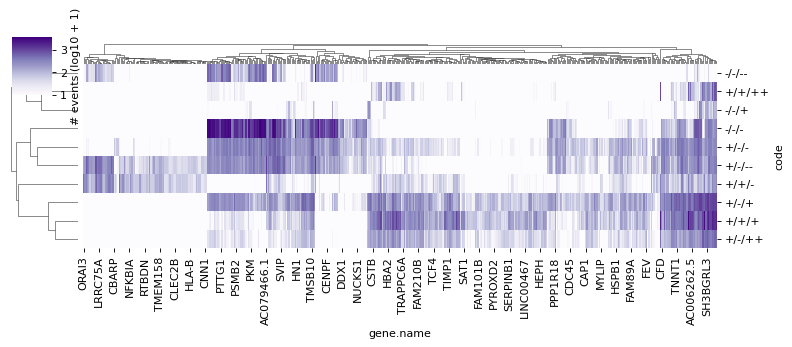

In [187]:
rcParams['figure.figsize'] = [6, 4]
rcParams['figure.dpi'] = 80
cg = sns.clustermap(np.log10(hm[hm.index.isin(top_var)] + 1).T, cmap='Purples', vmin=1, cbar_kws={'label': '# events (log10 + 1)'}, figsize=[10, 4],
                   dendrogram_ratio=.1)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), ha='center', rotation=90);
plt.savefig('../../data/figures/response_type_top500.pdf')
# plt.close()
plt.show()